# Google Play Store apps and reviews

# 1. Extract Data

In [5]:
import pandas as pd
apps_with_duplicates = pd.read_csv("res/apps.csv/apps.csv")

# Drop duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in thae dataset = ', apps.shape[0])

# Print a concise summary of apps dataframe 
print(apps.info())

# Have a look at a random sample of n rows 
n = 5
apps.sample(n)

Total number of apps in thae dataset =  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7775,8892,dt.se,NEWS_AND_MAGAZINES,3.1,124,12.0,"10,000+",Free,0,Everyone,News & Magazines,"June 29, 2018",4.9.0,4.1 and up
9000,10161,EZ Quran,BOOKS_AND_REFERENCE,4.6,595,8.5,"50,000+",Free,0,Everyone,Books & Reference,"June 28, 2016",6,4.1 and up
8837,9994,EW Gate,BUSINESS,NaN,0,12.0,50+,Free,0,Everyone,Business,"April 16, 2018",3.07,4.0 and up
4286,5240,AJ Concept Group App,HOUSE_AND_HOME,NaN,0,17.0,10+,Free,0,Everyone,House & Home,"July 25, 2017",3,4.0.3 and up
8077,9197,Online Kerala EB Bill Pay,FINANCE,4.0,37,3.9,"5,000+",Free,0,Everyone,Finance,"November 16, 2017",1.0.0,4.0.3 and up


# 2. Data Cleaning

In [8]:
# List of characters to remove 
chars_to_remove = [',', '$', '+']

# List of column names to clean 
cols_to_clean = ["Installs", "Price"] 

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string 
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '')

    # Convert col to numeric
    apps[col] = pd.to_numeric(apps[col])

print(apps['Installs'])
print("\n")
print(apps['Price'])

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
9654        5000
9655         100
9656        1000
9657        1000
9658    10000000
Name: Installs, Length: 9659, dtype: int64


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9654    0.0
9655    0.0
9656    0.0
9657    0.0
9658    0.0
Name: Price, Length: 9659, dtype: float64


# 3. Exploring app categories

In [3]:
pip install plotly==4.13.0

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=4139b42f7613a27a8f0e38e5b59f33dc05800fa1ab2d31f128bd8f09fcbd0206
  Stored in directory: c:\users\shreya\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [9]:
import plotly 
plotly.offline.init_notebook_mode(connected=True) 

import plotly.graph_objs as go

# Print the total number of unique categories 
num_categories = len(apps["Category"].unique()) 
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order 
num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

data = [go.Bar(x = num_apps_in_category.index, # index = category name 
               y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


# 4. Distribution of apps ratings

In [12]:
# Average rating of apps  
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings 
data = [go.Histogram(x = apps['Rating'])]

# Vertical dashed line to indicate the average app rating 
layout = {'shapes': [{'type':'line', 'x0':avg_app_rating, 'y0':0, 'x1':avg_app_rating, 'y1':1000,
                      'line':{ 'dash': 'dashdot'}
                     }]
         }
plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


# 5. Size and prize of an app

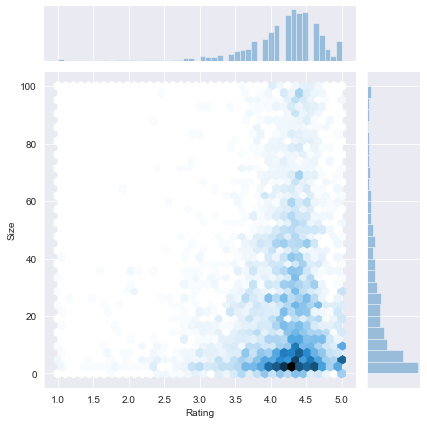

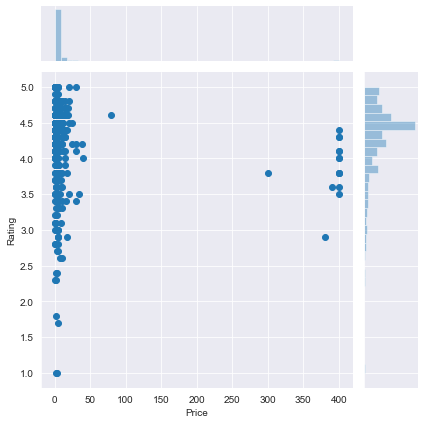

In [14]:
%matplotlib inline 
import seaborn as sns 

sns.set_style("darkgrid") 

import warnings
warnings.filterwarnings("ignore")

# Filter rows where both Rating and Size values are not null 
apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull()) & (~apps["Size"].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Rating"], y = large_categories["Size"], kind = 'hex')

# Subset apps whose 'Type' is 'Paid' 
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

# 6. Relation between app categories and app price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


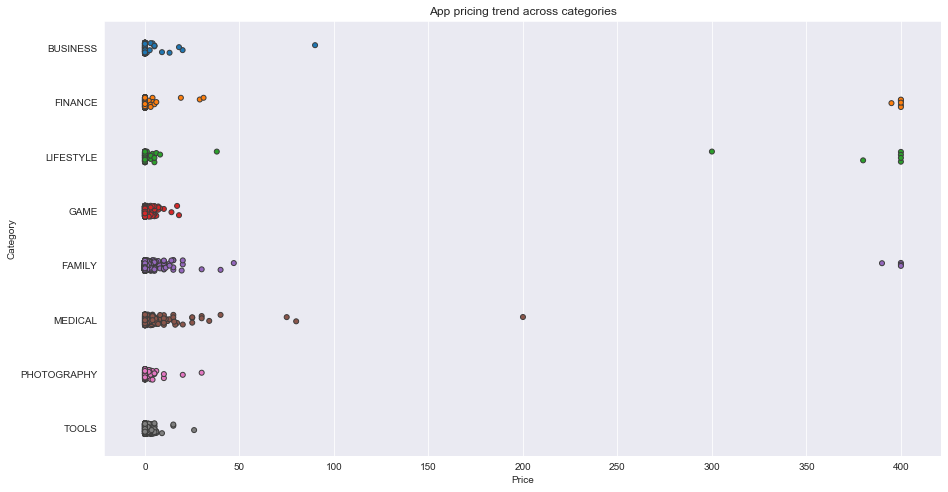

In [16]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots() 
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 
                                            'FINANCE', 'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats["Price"] > 200]
apps_above_200

# 7. Filer out "junk" apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

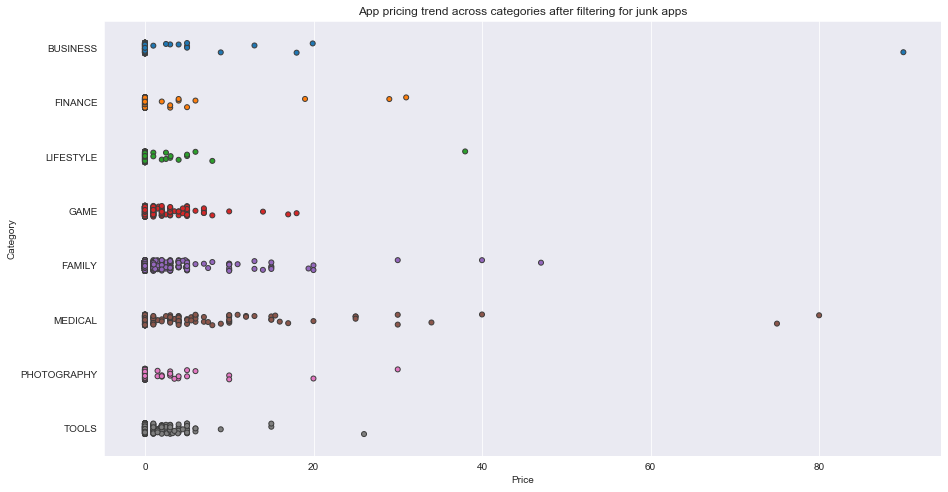

In [18]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots() 
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x=apps_under_100["Price"], y=apps_under_100["Category"], data=apps_under_100, jitter=True, linewidth=1)

ax.set_title('App pricing trend across categories after filtering for junk apps')

# 8. Popularity of paid apps vs free apps

In [52]:
trace0 = go.Box(
# Data for paid apps
y=apps[apps['Type'] == "Paid"]['Installs'], name = 'Paid'
)

trace1 = go.Box(
# Data for free apps
y=apps[apps['Type'] == "Free"]['Installs'], name = 'Free'
)

layout = go.Layout(title = "Number of downloads of paid apps vs. free apps", yaxis = dict(type = "log", autorange = True))

# Add trace0 and trace1 to a list for plotting 
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# 9. Sentiment analysis of user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

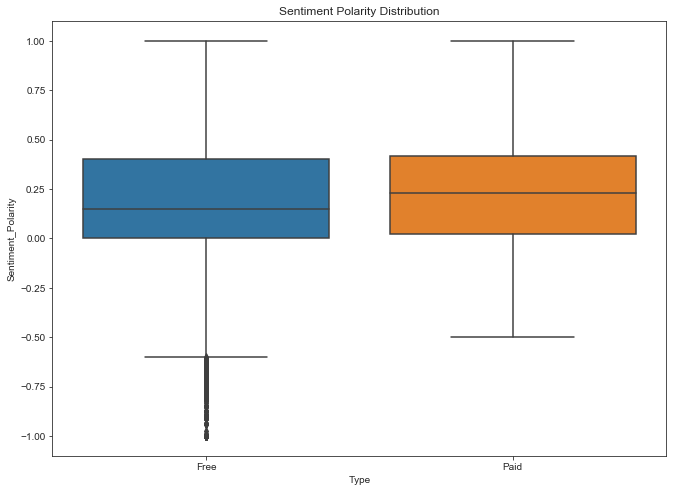

In [56]:
# Load user_reviews.csv
reviews_df = pd.read_csv("res/user_reviews.csv/user_reviews.csv")

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on = "App", how = "inner")

# Drop NA values from Sentiment and Translated_Review columns 
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks') 
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df) 
ax.set_title('Sentiment Polarity Distribution')

## Remove null values from reviews_df

In [58]:
reviews_df = reviews_df.dropna() 
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


## Draw histogram to understand "Sentiment" distribution

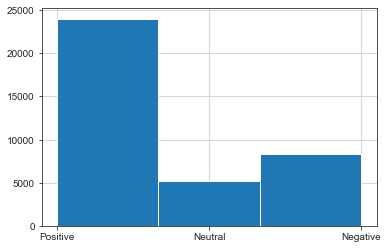

In [60]:
# Sentiment histogram 
reviews_df["Sentiment"].hist(bins=3)

## Few positive reviews

In [61]:
reviews_df[reviews_df["Sentiment"]=="Positive"]["Translated_Review"].head( 10)

0     I like eat delicious food. That's I'm cooking ...
1       This help eating healthy exercise regular basis
3            Works great especially going grocery store
4                                          Best idea us
5                                              Best way
6                                               Amazing
10                                            good you.
11    Useful information The amount spelling errors ...
12    Thank you! Great app!! Add arthritis, eyes, im...
13    Greatest ever Completely awesome maintain heal...
Name: Translated_Review, dtype: object

## Lets make a wordcloud, why not :P

In [67]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


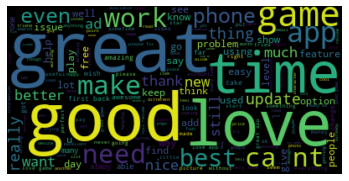

In [77]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from nltk.tokenize import word_tokenize

# Extract all the reviews 
text = " ".join(reviews_df[reviews_df["Sentiment"]=="Positive"]["Translated_Review"])

tokens = word_tokenize(text) 

# convert to lower case
tokens = [w.lower() for w in tokens]
               
# remove punctuation from each word 
import string
table = str.maketrans('', '', string.punctuation) 
stripped = [w.translate(table) for w in tokens]
               
# remove remaining tokens that are not alphabetic 
words = [word for word in stripped if word.isalpha()] 

# filter out stop words
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
               
words = [w for w in words if not w in stop_words]  # print(words[:100])

wordcloud = WordCloud().generate(" ".join(words))

# Display the generated image: 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.show()

## Few neutral reviews

In [70]:
reviews_df[reviews_df["Sentiment"]=="Neutral"]["Translated_Review"].head( 10)

8                      Looking forward app,
9     It helpful site ! It help foods get !
22                               God health
25        I found lot wealth form health...
29                              On test....
51                                   I like
56                             This helpful
61                                      Luv
64                     Doesn't work... Zero
86                    This 5 starr Download
Name: Translated_Review, dtype: object

## Few negative reviews

In [71]:
reviews_df[reviews_df["Sentiment"]=="Negative"]["Translated_Review"].head (10)

32                    No recipe book Unable recipe book.
43     Waste time It needs internet time n ask calls ...
68                               Faltu plz waste ur time
85                                     Crap Doesn't work
95     Boring. I thought actually just texts that's i...
132                   No recipe book Unable recipe book.
143    Waste time It needs internet time n ask calls ...
168                              Faltu plz waste ur time
185                                    Crap Doesn't work
195    Boring. I thought actually just texts that's i...
Name: Translated_Review, dtype: object